In [14]:
import numpy as np
import sympy as sp
from sympy import Symbol
from sympy import solve, Poly, Eq, Function, exp
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import find_peaks
from scipy.constants import lambda2nu, nu2lambda, c
import os
import imp
import matplotlib.pyplot as plt
import sys

#windows path
os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\') 
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')

#linux path
#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/home/moises/Downloads/'))


In [20]:
fdtd = lumapi.FDTD(filename= 'MMI.fsp')

## parameters

In [89]:
W1 = 1.48e-6
W2 = 1.48e-6
W3 = 1.6e-6
W4 = 0.5e-6
W5 = 0.7e-6
W6 = 0.2e-6
L1 = 1e-6
L2 = 2.4e-6
L3 = 1.6e-6
height = 0.22e-6
c = 299792458
length = 2*(L1 + L2 + L3)
band_0 = 1.53e-6
band_1 = 1.565e-6
material_core = 'Si (Silicon) - Palik Copy 1'
material_subs = 'SiO2 (Glass) - Palik Copy 1'

In [209]:
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper1',
'x':0,
'y':W6/2 + W5/2,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':W4,
'width_r':W5,
'len':L1,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper2',
'x':0,
'y':-W6/2 - W5/2,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':W4,
'width_r':W5,
'len':L1,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper3',
'x':L1/2 + L2/2,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':2*W5 + W6,
'width_r':W1,
'len':L2,
'material':material_core})

fdtd.addrect()
fdtd.set({'x min':L1/2 + L2,
'x max':L1/2 + L2 + 2*L3,
'y':0,
'y span':W2,
'z':0,
'z span':height,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper4',
'x':L1/2 + L2 + 2*L3 + L2/2,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':W1,
'width_r':W3,
'len':L2,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper5',
'x':L1/2 + L2 + 2*L3 + L2 + L1/2,
'y':W6/2 + W5/2,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':W5,
'width_r':W4,
'len':L1,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper6',
'x':L1/2 + L2 + 2*L3 + L2 + L1/2,
'y':-W6/2 - W5/2,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':W5,
'width_r':W4,
'len':L1,
'material':material_core})

fdtd.addrect()
z_span = 4e-6
z = -height/2 - z_span/2
fdtd.set({'x':L1/2 + L2 + L3,
'x span':15e-6,
'y':0,
'y span':10e-6,
'z':z,
'z span':z_span,
'material':material_subs})

fdtd.addrect()
fdtd.set({'x':-L1,
'x span':L1,
'y':W6/2 + W5/2,
'y span':W4,
'z':0,
'z span':height,
'material':material_core})

fdtd.addrect()
fdtd.set({'x':-L1,
'x span':L1,
'y':-W6/2 - W5/2,
'y span':W4,
'z':0,
'z span':height,
'material':material_core})

fdtd.addrect()
fdtd.set({'x':L1/2 + L2 + 2*L3 + L2 + L1/2 + L1,
'x span':L1,
'y':W6/2 + W5/2,
'y span':W4,
'z':0,
'z span':height,
'material':material_core})

fdtd.addrect()
fdtd.set({'x':L1/2 + L2 + 2*L3 + L2 + L1/2 + L1,
'x span':L1,
'y':-W6/2 - W5/2,
'y span':W4,
'z':0,
'z span':height,
'material':material_core})

{!!}

{!!}

{!!}

{!!}

{!!}



C:\Program Files\Lumerical\v202\api\python\lumapi.py:138: UserWarning: Multiple objects named '::model::rectangle'. Use of this object may give unexpected results.
  warnings.warn(message)


In [223]:
fdtd.switchtolayout()
fdtd.select('FDTD')
fdtd.delete()
fdtd.select('monitor')
fdtd.delete()
fdtd.select('mesh')
fdtd.delete()
dx = 0.01e-6
mesh = 4
fdtd.addfdtd()
nof = 500 ## number of frequency points
fdtd.set({'x min':-L1,
'x max':L1/2 + L2 + 2*L3 + L2 + L1/2 + L1,
'y':0,
'y span':4e-6,
'z':0,
'z span':4e-6,
'simulation time':1250e-15,
'mesh accuracy':mesh})

fdtd.addport()
fdtd.set({'injection axis':'x-axis',
'direction':'Forward',
'x':-L1/2,
'y':W6/2 + W5/2,
'y span':0.75e-6,
'z':0,
'z span':4e-6})

fdtd.addport()
fdtd.set({'injection axis':'x-axis',
'direction':'Forward',
'x':-L1/2,
'y':-W6/2 - W5/2,
'y span':0.75e-6,
'z':0,
'z span':4e-6})

fdtd.addport()
fdtd.set({'injection axis':'x-axis',
'direction':'Backward',
'x':L1/2 + L2 + 2*L3 + L2 + L1/2 + L1/2,
'y':W6/2 + W5/2,
'y span':0.75e-6,
'z':0,
'z span':4e-6})

fdtd.addport()
fdtd.set({'injection axis':'x-axis',
'direction':'Backward',
'x':L1/2 + L2 + 2*L3 + L2 + L1/2 + L1/2,
'y':-W6/2 - W5/2,
'y span':0.75e-6,
'z':0,
'z span':4e-6})

fdtd.select('FDTD::ports')
fdtd.set('monitor frequency points', nof)
#fdtd.set('wavelength start',1.53e-6)
#fdtd.set('wavelengh stop',1.565e-6)

fdtd.addprofile()
fdtd.set({'x min':-L1,
'x max':L1/2 + L2 + 2*L3 + L2 + L1/2 + L1,
'y':0,
'y span':4e-6,
'z':0,
'override global monitor settings':1,
'frequency points':nof})

fdtd.run()

In [5]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

In [47]:
eField = np.squeeze(fdtd.getelectric("monitor"))

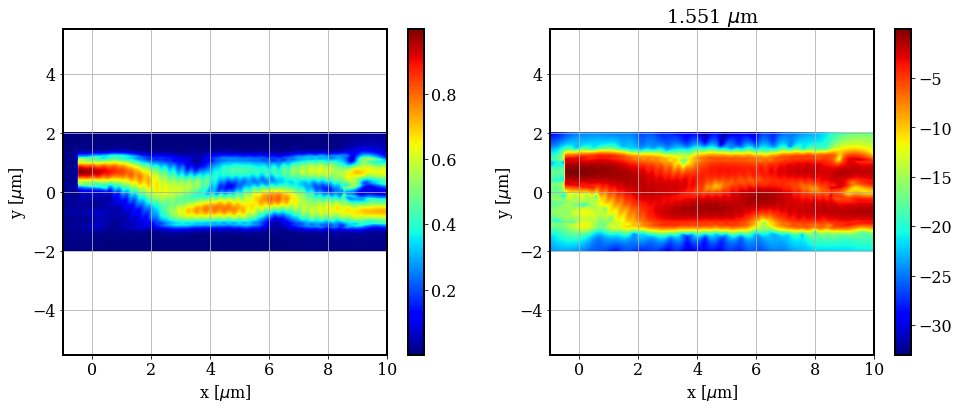

In [66]:
indxLambda = 202
x_efielf = fdtd.getdata("monitor", "x")
y_efielf = fdtd.getdata("monitor", "y")
lmbd = nu2lambda(fdtd.getdata("monitor", "f"))
xmin = 1e6*np.min(x_efielf);
xmax = 1e6*np.max(x_efielf);
ymin = 1e6*np.min(y_efielf);
ymax = 1e6*np.max(y_efielf);

fig1, axs1 = plt.subplots(1,2,figsize=(16,6))
im1 = axs1[0].imshow(np.rot90(np.sqrt(eField[:,:,indxLambda])), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im1, ax=axs1[0])
axs1[0].set_xlabel(r'x [$\mu$m]')
axs1[0].set_ylabel(r'y [$\mu$m]')
#axs1[0].set_title(r'%4.3f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[0].grid(True)
axs1[0].axis('equal')

im2 = axs1[1].imshow(10*np.log10(np.rot90(np.sqrt(eField[:,:,indxLambda]))), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im2, ax=axs1[1])
axs1[1].set_xlabel(r'x [$\mu$m]')
axs1[1].set_ylabel(r'y [$\mu$m]')
axs1[1].set_title(r'%4.3f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[1].grid(True)
axs1[1].axis('equal')

fig1.tight_layout
plt.rcParams.update({'font.size': 16})

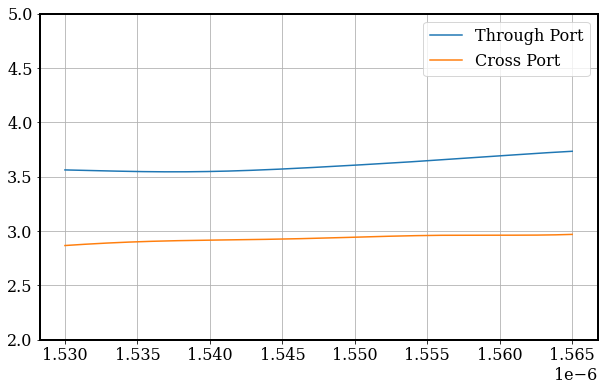

In [21]:
R1 = fdtd.getresult('FDTD::ports::port 1', 'T')
R3 = fdtd.getresult('FDTD::ports::port 3', 'T') ##port3 result
R4 = fdtd.getresult('FDTD::ports::port 4', 'T')

T1 = 10*np.log10(R1['T'])
T3 = 10*np.log10(R3['T'])
T4 = 10*np.log10(R4['T'])
wavelength = R3['lambda']

figure = plt.figure(figsize = (10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength,-T3, label = 'Through Port' )
plt.plot(wavelength,-T4, label = 'Cross Port')
plt.ylim([2, 5])
#plt.xlim([1.53e-6,1.565e-6])
plt.grid(True)
plt.legend(loc = 'upper right')

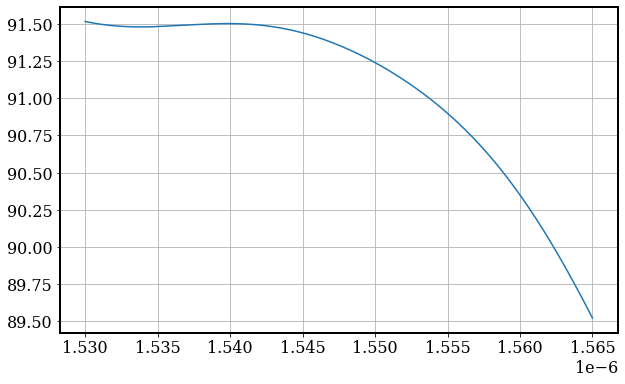

In [22]:
port3S = fdtd.getresult('FDTD::ports::port 3','S')
port4S = fdtd.getresult('FDTD::ports::port 4','S')
phase_3 = fdtd.angle(port3S['S'])
phase_4 = fdtd.angle(port4S['S'])
angle_3 = fdtd.unwrap(phase_3)*180/(np.pi)
angle_4 = fdtd.unwrap(phase_4)*180/(np.pi)
lambd = port3S['lambda']

figure = plt.figure(figsize = (10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(lambd, (angle_4 - angle_3)-180)
#plt.plot(lambd, angle_3)
#plt.plot(lambd, angle_4)
plt.grid(True)